### EfficientNetV2 XL - max

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
  if i == 5: print("")
  print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['0']
for i in range(1,10):
  aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/10.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))

Accuracy score pr fold
0.0, 0.6407766990291263, 0.6563106796116505, 0.6660194174757281, 0.658252427184466, 
0.0, 0.6640776699029126, 0.6640776699029126, 0.6388349514563106, 0.6601941747572816, 
MSE pr fold
35.66852405065266, 0.33208802779650715, 0.34259102914849693, 0.3283456414539243, 0.32418005153016166, 
35.54192174332755, 0.5324598517986373, 0.32301506257637114, 0.34414067036766405, 0.3260246678032004, 
aggregate accuracy, mse
0.31650485436893205 1.607417766265556


### Results without outlier folds

In [3]:
fold_preds = pd.read_csv("preds.csv")
y_true = pd.read_csv("test_set_files.csv")
  
print("Accuracy score pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(accuracy_score(fold_preds[str(i)].round().astype('int'), y_true.age) , end = ', ')
print("")

print("MSE pr fold")    
for i in range(0,10):
    if i == 5: print("")
    print(mean_squared_error(fold_preds[str(i)], y_true.age), end = ', ') 
print("")
  
aggregate_pred = fold_preds['1']
for i in range(2,10):
    if i!=0 and i!=5:
        aggregate_pred += fold_preds[str(i)]

aggregate_pred = aggregate_pred/8.0
print("aggregate accuracy, mse")
print(str( accuracy_score(aggregate_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(aggregate_pred, y_true.age) ))

Accuracy score pr fold
0.0, 0.6407766990291263, 0.6563106796116505, 0.6660194174757281, 0.658252427184466, 
0.0, 0.6640776699029126, 0.6640776699029126, 0.6388349514563106, 0.6601941747572816, 
MSE pr fold
35.66852405065266, 0.33208802779650715, 0.34259102914849693, 0.3283456414539243, 0.32418005153016166, 
35.54192174332755, 0.5324598517986373, 0.32301506257637114, 0.34414067036766405, 0.3260246678032004, 
aggregate accuracy, mse
0.6757281553398058 0.3205601945777297


### Boxplot of prediction pr age class

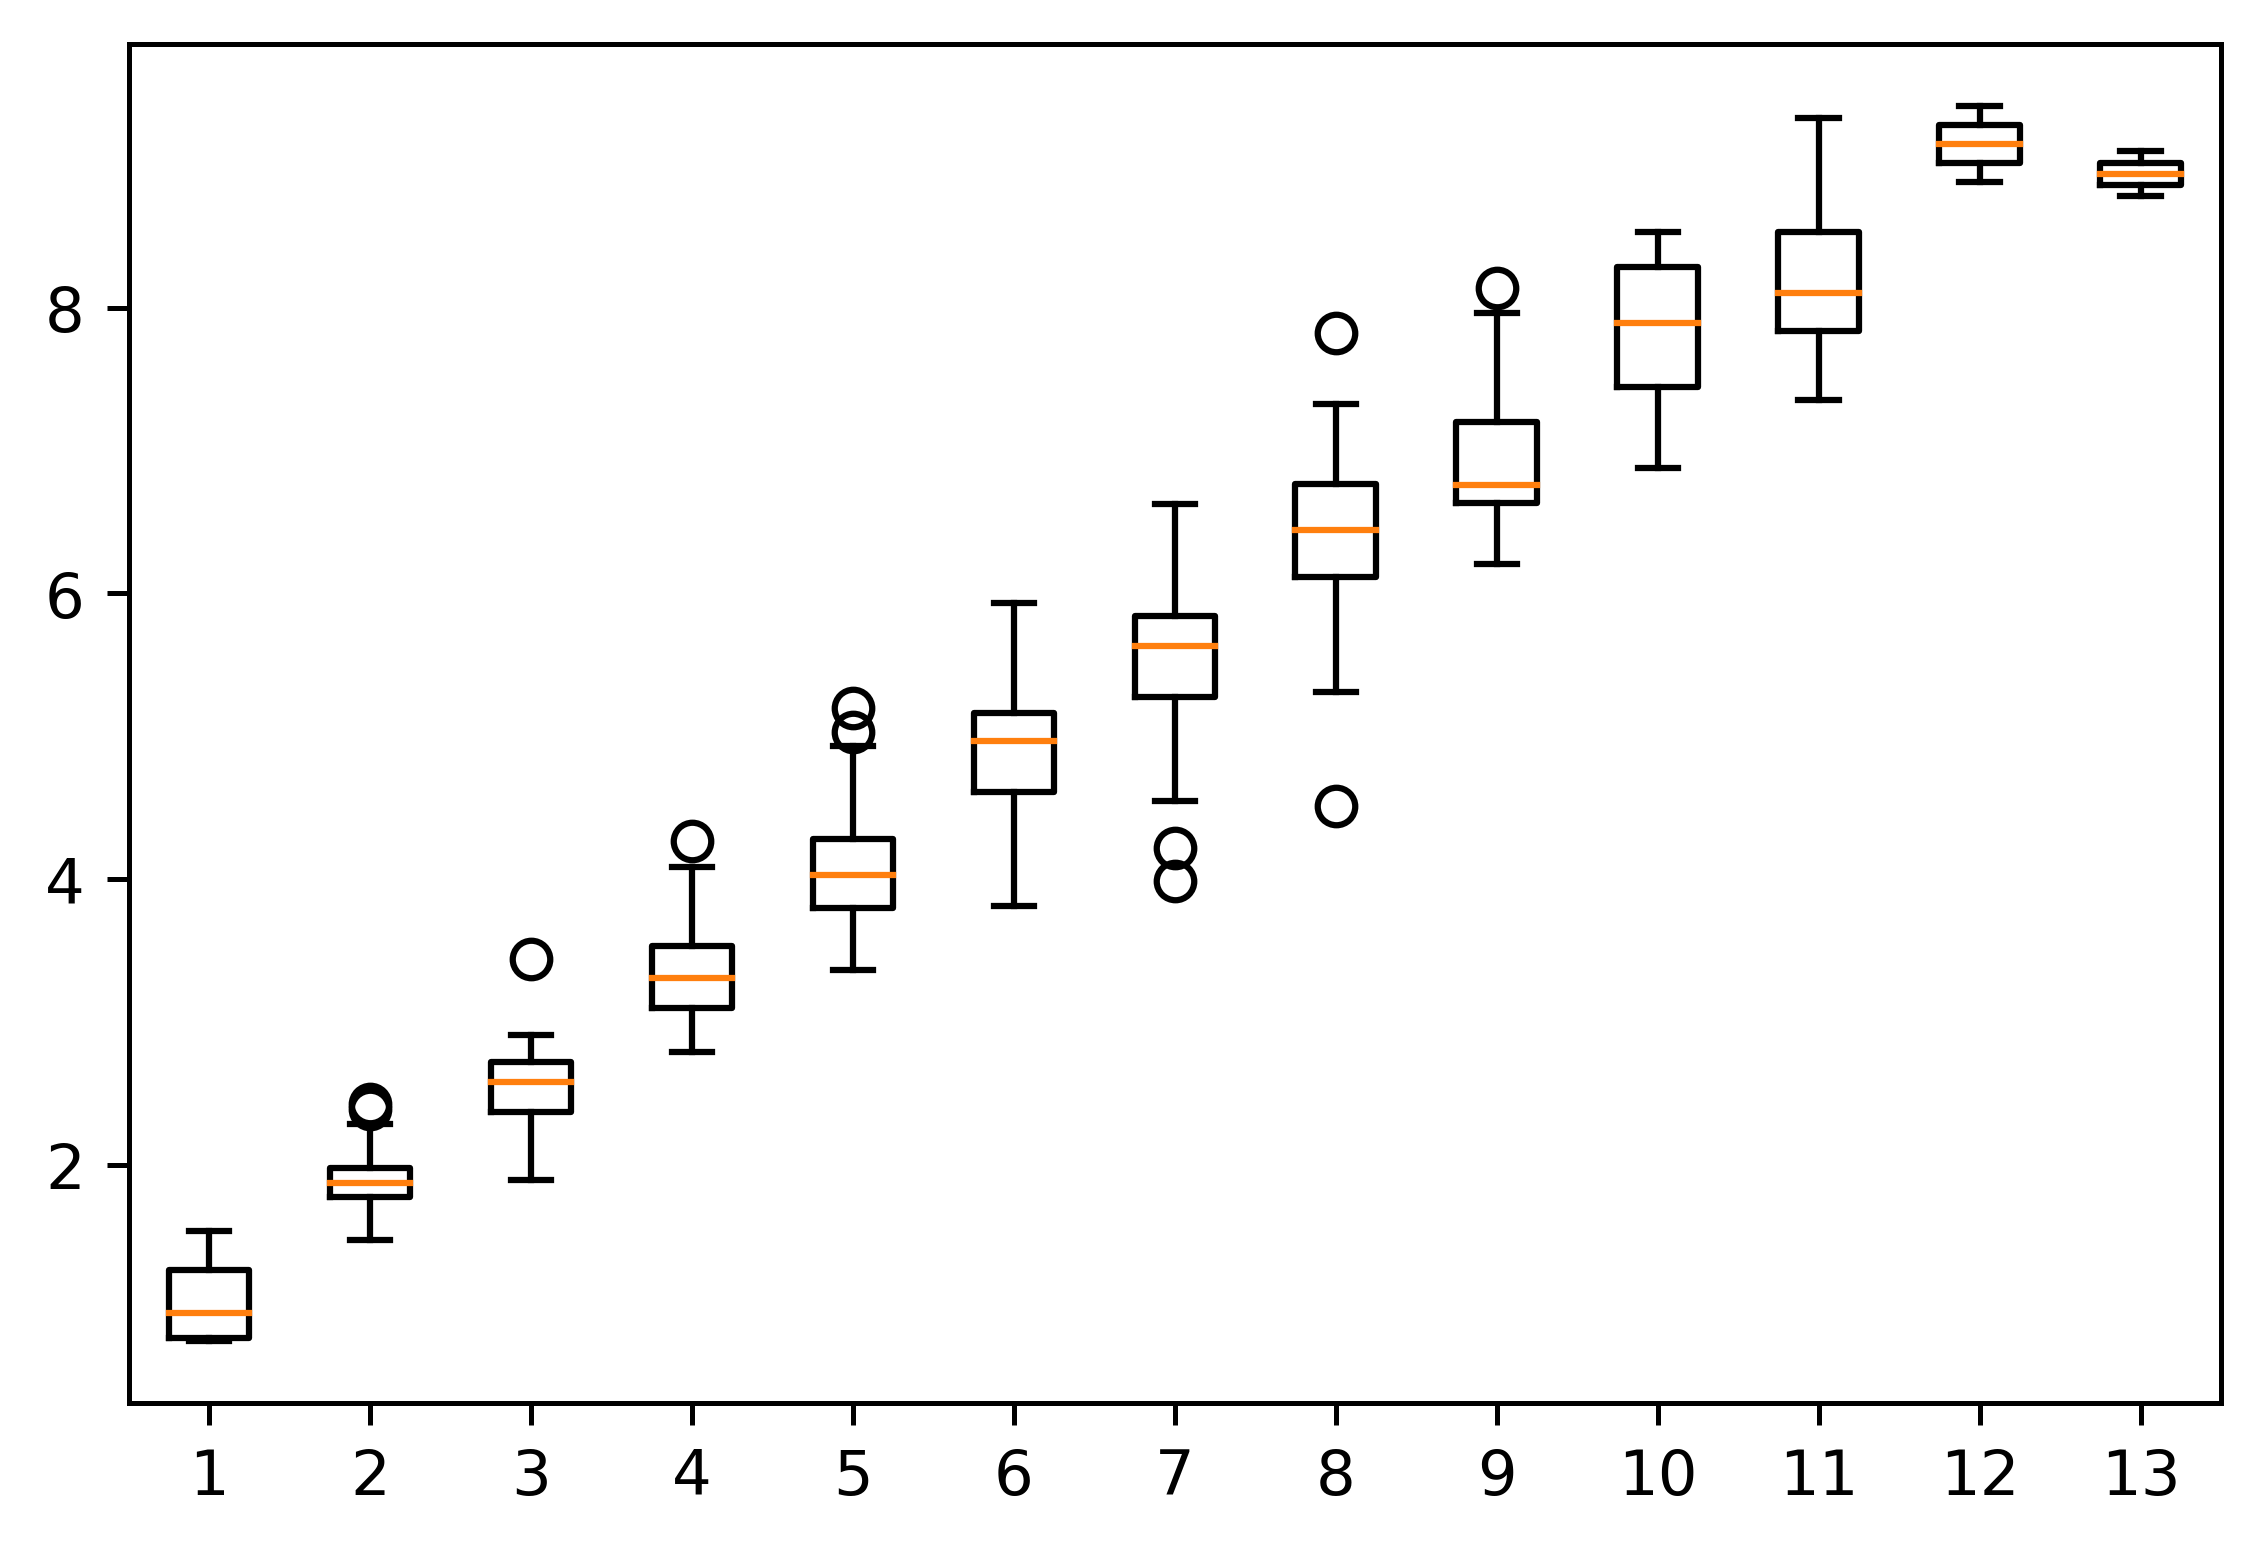

In [3]:
plt.rcParams['figure.dpi'] = 450
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] )

plt.boxplot(pr_age_group)
plt.show()

### Residual plot per age group
The predictions show heteroskedasticity: heteroskedasticity happens when the standard deviations of a predicted variable, monitored over different values of an independent variable or as related to prior time periods, are non-constant.

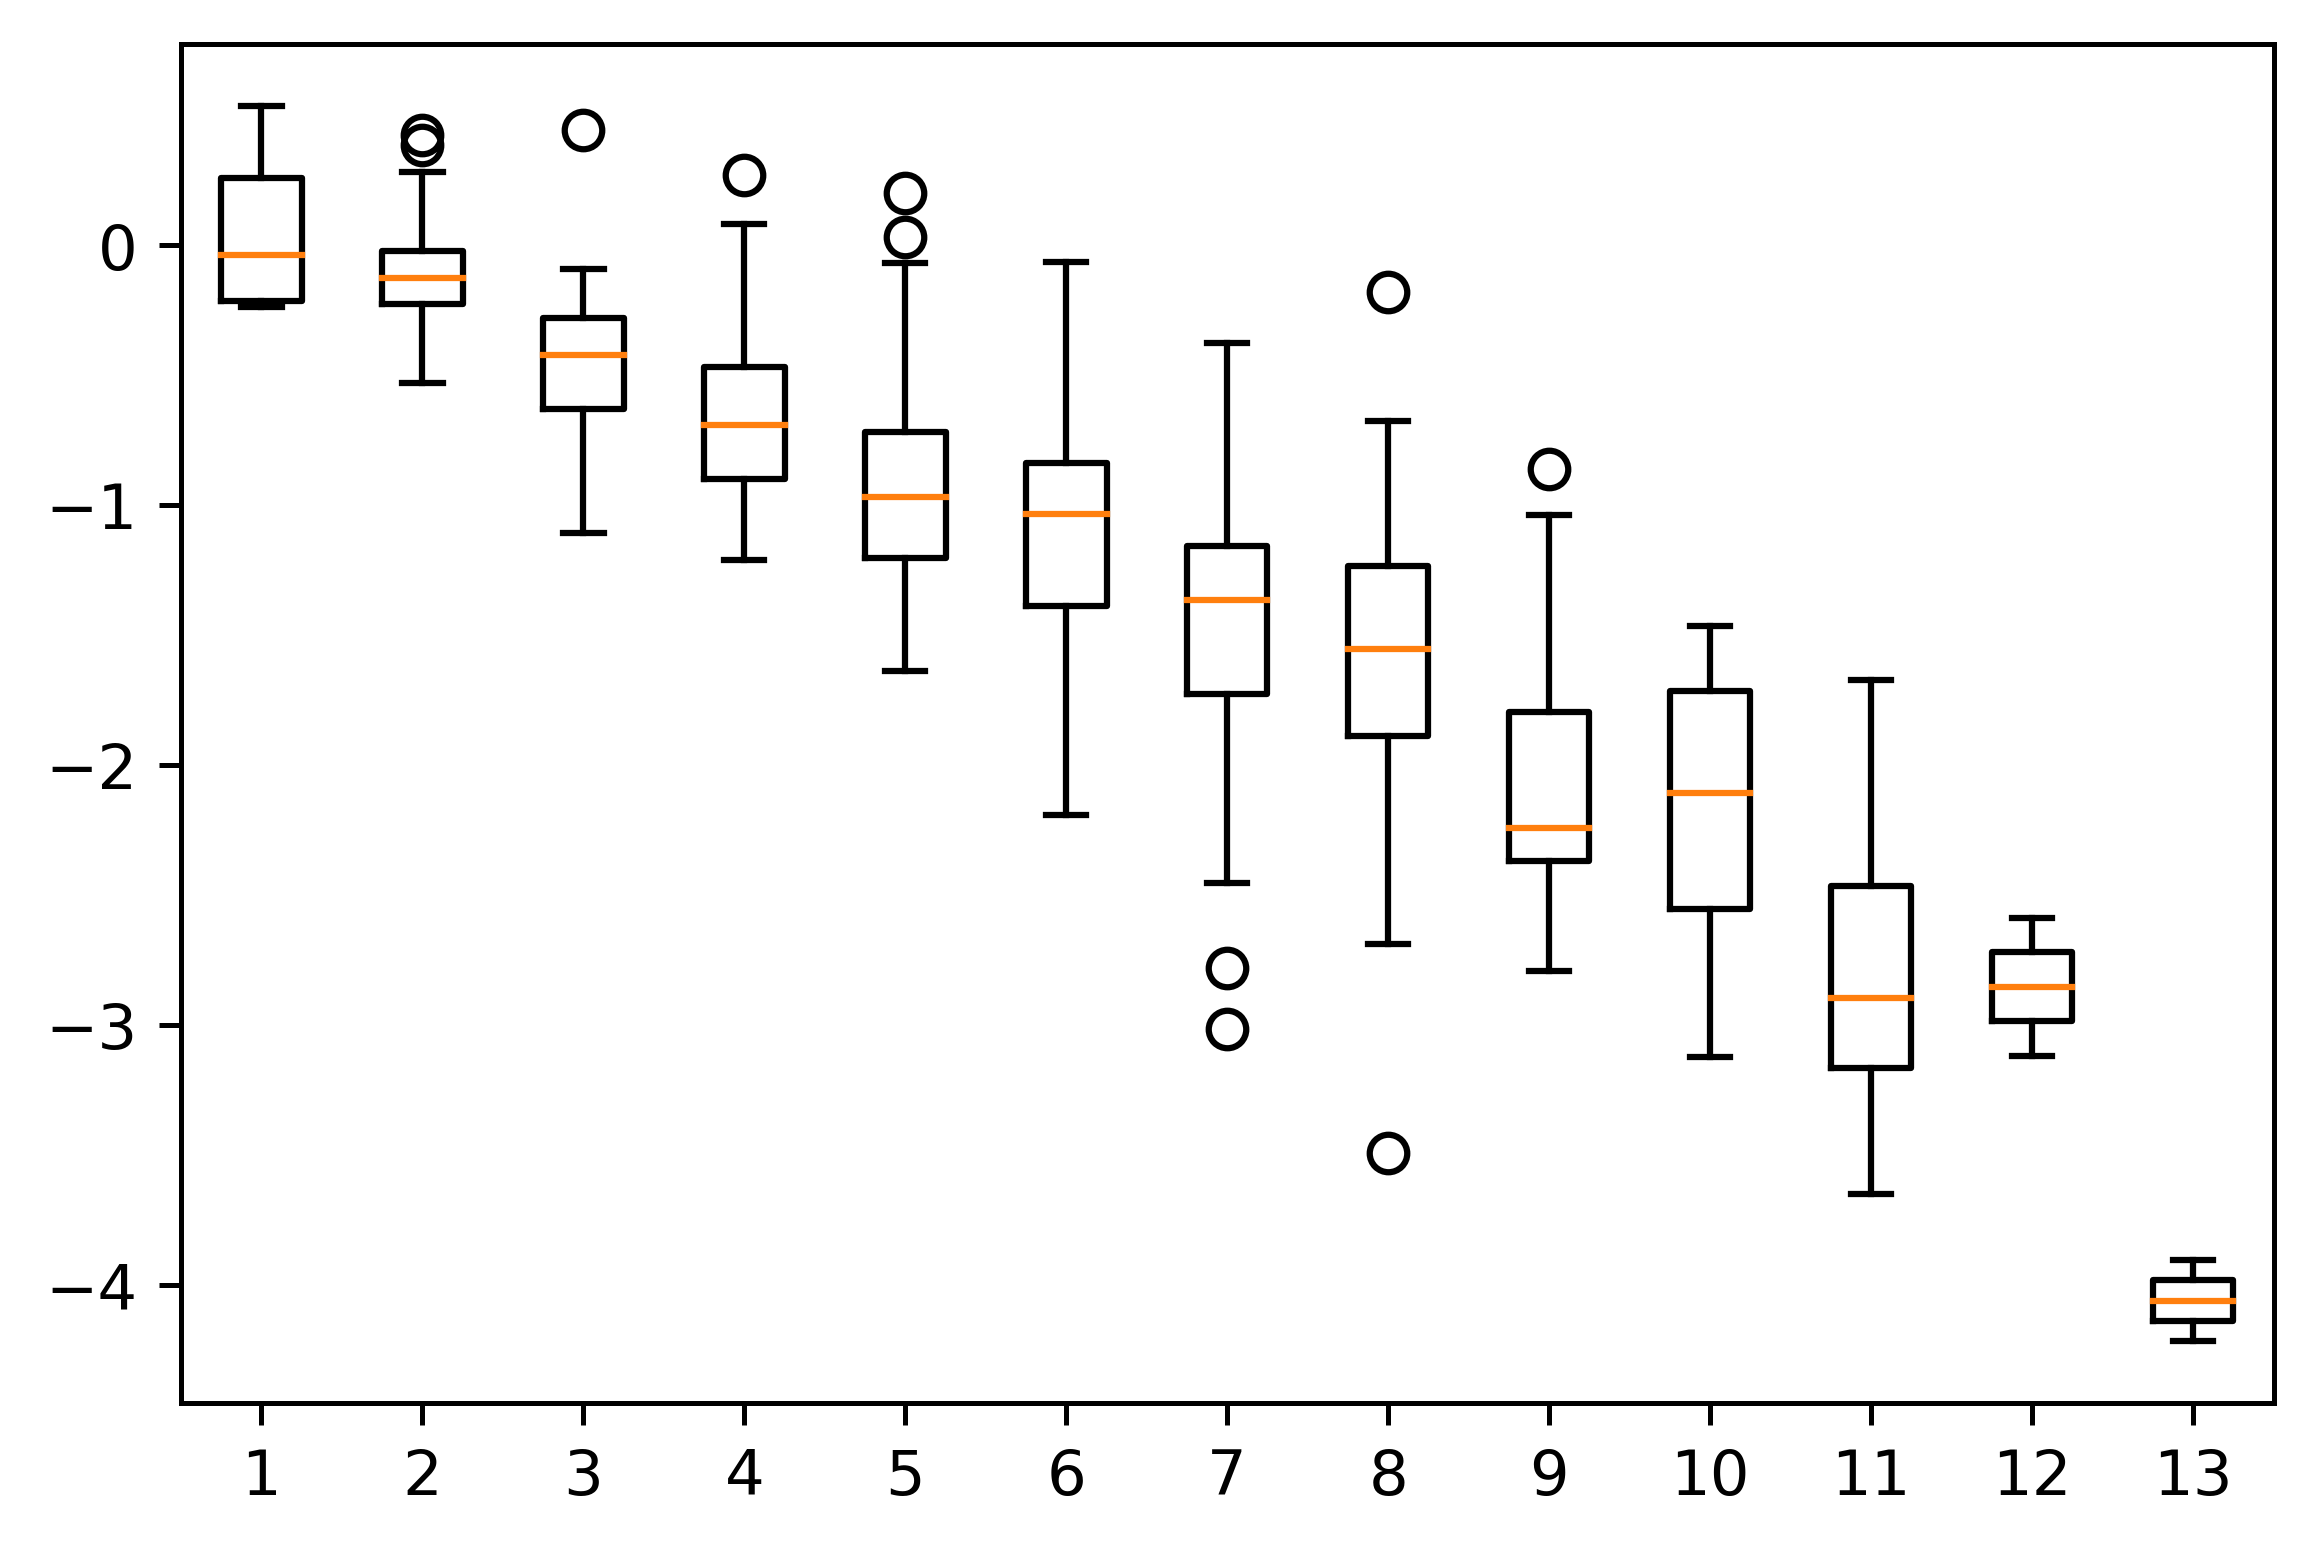

In [5]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(pr_age_group)
plt.show()

### Box plot of mode error summarized over all age groups, and summary statistics

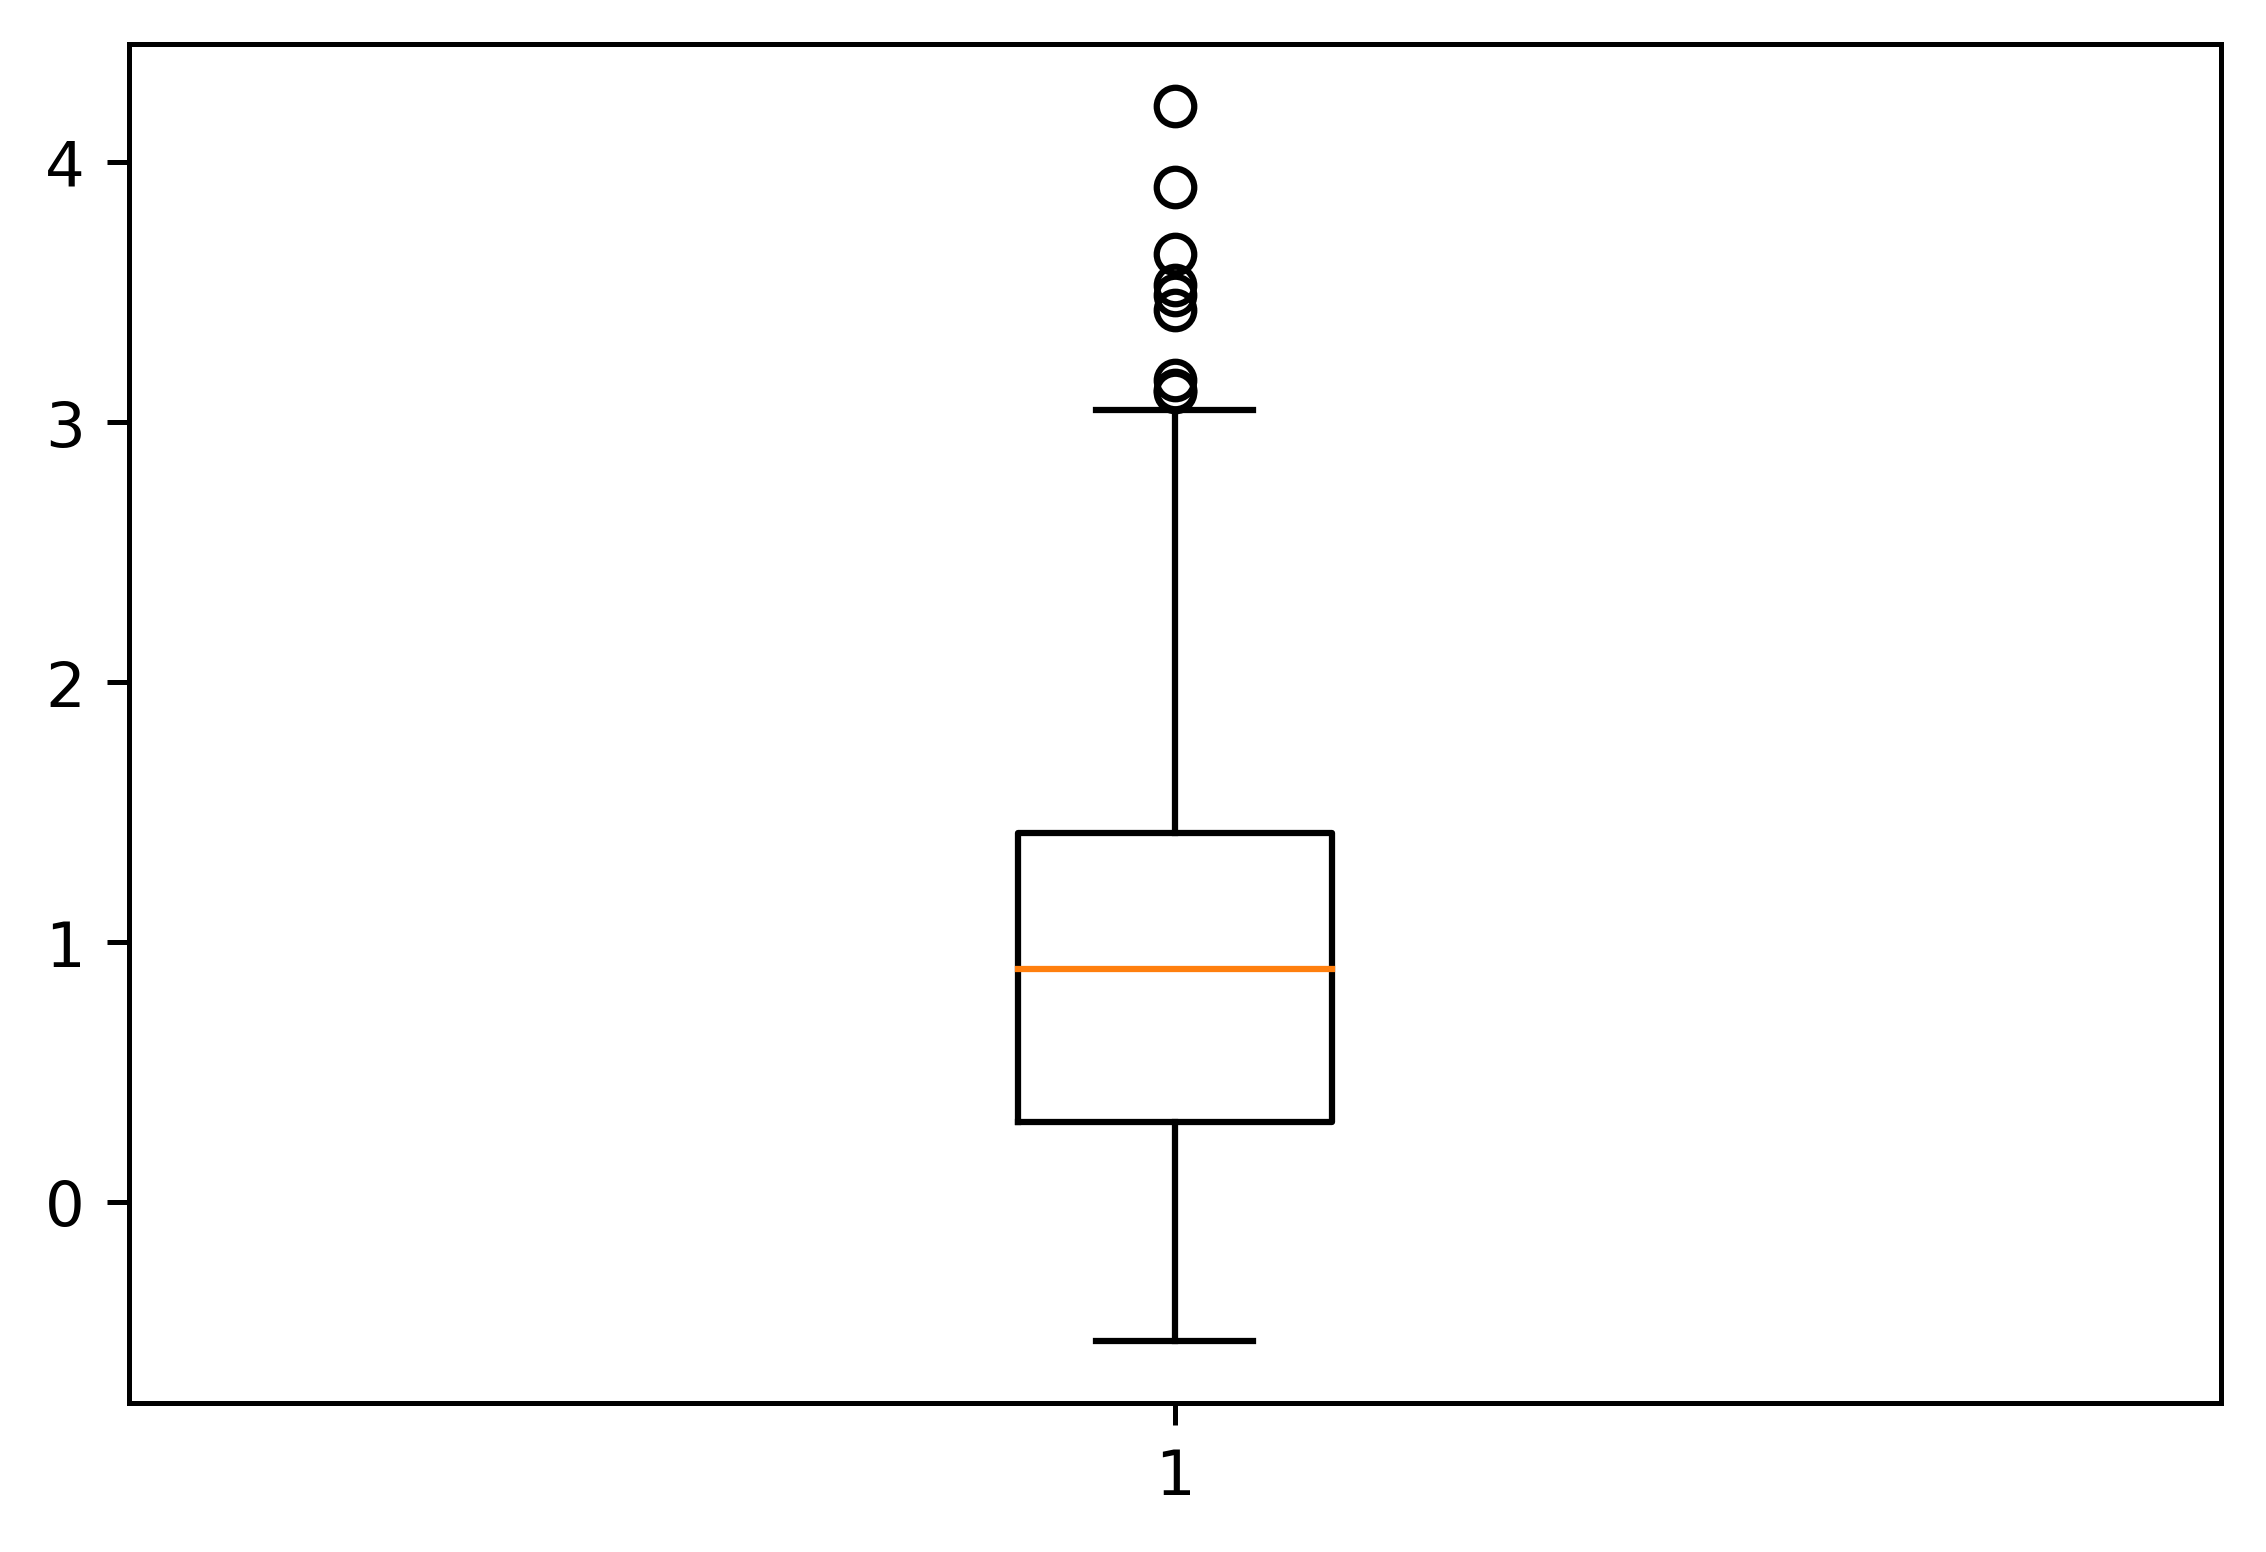

,0
count,515.000000
mean,0.974356
std,0.811991
min,-0.535829
25%,0.309097
50%,0.897316
75%,1.420677
max,4.217151


In [6]:
x = y_true.age.values
y = aggregate_pred.values
errors = x-y
pr_age_group = []
for i in age_range:
    age_idx = np.where(x == i)
    pr_age_group.append( y[age_idx] - i )

plt.boxplot(errors)
plt.show()


df_describe = pd.DataFrame(errors)
df_describe.describe()

### Scatterplot error predictions after rounding

In [ ]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
pr_age_group = []
all_rounding_err1 = []
all_rounding_err2 = []
for i in age_range:
    age_idx = np.where(x == i)
    errors = y[age_idx] - i
    errors1 = errors[(np.abs(errors) >= 0.5) & (np.abs(errors) < 1.5)]
    x_axis = [i]*len(errors1)
    plt.scatter(x_axis, errors1, color="orange")
    
    errors2 = errors[np.abs(errors) >= 1.5 ]
    x_axis = [i]*len(errors2)
    plt.scatter(x_axis, errors2, color="red")
    all_rounding_err1.append(errors1)
    all_rounding_err2.append(errors2)
    

flat_list = [item for sublist in all_rounding_err1 for item in sublist]   
oneError = len(flat_list)
print("errors in [0.5, 1.5):  "+ str( oneError ) )

flat_list = [item for sublist in all_rounding_err2 for item in sublist]    
twoOrMore = len(flat_list)
print("errors in [1.5, \inf): "+ str( twoOrMore ) )
print("Total missclassification errors:"+str(oneError+twoOrMore))

plt.show()

### Excluding min/max prediction by fold pr prediction

In [7]:
all_preds = pd.DataFrame()
for i in range(1,10):
  all_preds[str(i)] = fold_preds[str(i)]

all_preds.head()
all_preds['new_pred'] =0.0
for index, row in all_preds.iterrows():
    mask = np.logical_or(row == row.max(), row == row.min())
    #print(mask)
    #print(row)
    row_masked = np.ma.masked_array(row, mask = mask)
    #print(row_masked)
    all_preds['new_pred'].iloc[index] = row_masked.mean()
    
all_preds.head()

print("aggregate accuracy, mse")
print(str( accuracy_score(all_preds.new_pred.round().astype("int"), y_true.age) )+ " " + 
      str( mean_squared_error(all_preds.new_pred, y_true.age) ))
#0.7165048543689321 0.2812634011698365

aggregate accuracy, mse
0.4796116504854369 0.7946552546282418


### Outliers >= 1.5 years

In [8]:
x = y_true.age.values
y = aggregate_pred.values
age_range = np.unique(y_true.age.values)
for i in age_range:
    age_idx = np.where(x == i)
    for j in age_idx[0]:
        if np.abs( y[ j ] - i ) >= 1.5:
            print(str(y[j])+" "+str(i), end=',')
            print(j)
            #print(y_true.iloc[j].path)

3.4641510963439943 5,96
3.4773549690842627 5,132
3.481142874062061 5,252
3.3624362148344518 5,500
3.955177491903305 6,26
4.457526624202728 6,74
4.472915709018707 6,134
4.414369030296802 6,161
4.337571531534195 6,226
4.457374839484691 6,281
4.342422889173031 6,329
4.292664261162281 6,351
4.4234974279999735 6,420
4.441251137852669 6,440
3.8093547195196154 6,457
5.293378974497318 7,7
5.269030609726906 7,49
4.218838070333004 7,71
5.194093468785286 7,84
5.367813076078892 7,128
5.212522767484188 7,172
5.233150498569012 7,183
5.25309469550848 7,219
5.382246121764183 7,221
5.153394003212452 7,248
5.275372724235058 7,265
5.267635825276375 7,271
5.3052330493927 7,302
4.54730412364006 7,320
5.497916895151138 7,337
3.9833360478281974 7,362
5.204949708282948 7,389
5.278787484765052 7,398
4.640293854475021 7,407
5.100029109418392 7,443
5.313723337650299 7,452
5.0709295004606245 7,485
6.128999164700508 8,1
6.0122755989432335 8,2
5.952020621299743 8,19
6.27618044167757 8,35
6.389526480436325 8,44
5.31